# Fashion-MNIST Project

In [32]:
from __future__ import absolute_import, division, print_function, unicode_literals
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import importlib
from sklearn.pipeline import Pipeline
from sklearn import metrics
from sklearn.ensemble import AdaBoostClassifier, BaggingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.calibration import CalibratedClassifierCV
import utils
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_predict, cross_val_score, GridSearchCV
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
import numpy as np
import matplotlib.pyplot as plt
importlib.reload(utils)

%matplotlib inline


In [ ]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
train_images


array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

## The Labels according to their numbers in the array

Label: 0    ---> Class: T-shirt/top

Label: 1	---> Class: Trouser

Label: 2	---> Class: Pullover

Label: 3	---> Class: Dress

Label: 4	---> Class: Coat

Label: 5	---> Class: Sandal

Label: 6	---> Class: Shirt

Label: 7	---> Class: Sneaker

Label: 8	---> Class: Bag

Label: 9	---> Class: Ankle boot


In [ ]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


Explore the Data

In [ ]:
train_images.shape


(60000, 28, 28)

In [ ]:
len(train_labels)


60000

In [ ]:
test_images.shape


(10000, 28, 28)

In [ ]:
len(test_labels)


10000

Preprocess the data

In [ ]:
# To transform the images to be in scale from 0-1
train_images = train_images / 255.0

test_images = test_images / 255.0


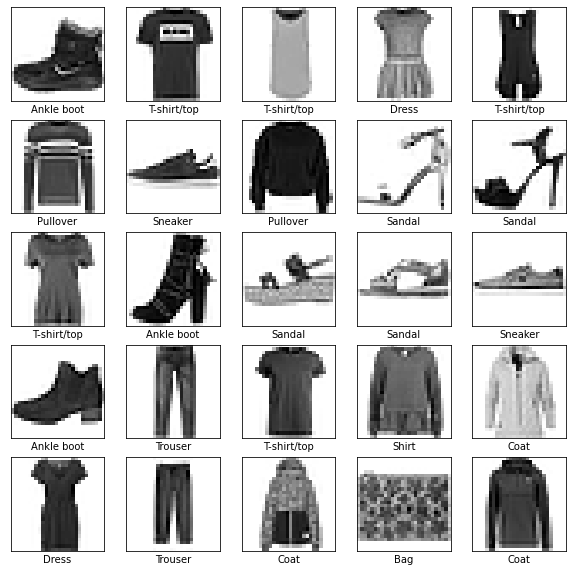

In [ ]:
# Show the first 25 images

utils.plot_multi_images(train_images, train_labels, class_names)


Build the model

In [ ]:
print(train_images.shape)
X_train = []
X_test = []
for i in range(len(train_images)):
    temp = train_images[i].reshape(-1, 784)
    X_train.append(temp[0])
X_train = np.array(X_train)
for i in range(len(test_images)):
    temp = test_images[i].reshape(-1, 784)
    X_test.append(temp[0])
X_test = np.array(X_test)
print(X_test.shape)

y_train = train_labels.copy()
y_test = test_labels.copy()


(60000, 28, 28)
(10000, 784)


In [ ]:
X_train_ = X_train
X_test_ = X_test
y_train_ = y_train
y_test_ = y_test

### Best K for Knn algorithm

In [ ]:
best_k = 3

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
The best accuracy of the knn model is when k = 3 , and the score is: 0.8577


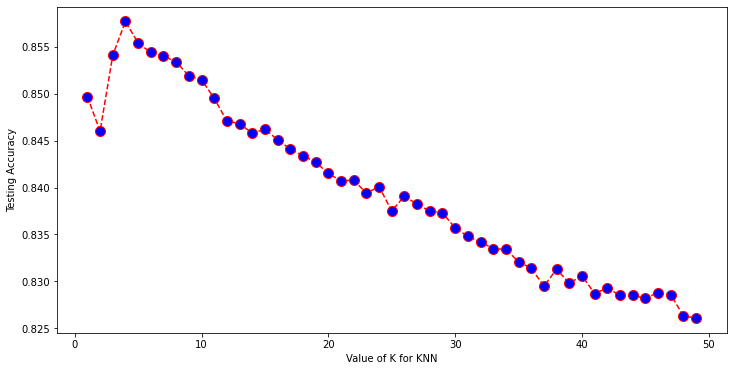

In [ ]:
k_range = range(1,50)
scores = []
for k in k_range:
    print(k)
    knn_ = KNeighborsClassifier(n_neighbors=k)
    knn_.fit(X_train, y_train)
    y_pred = knn_.predict(X_test)
    scores.append(metrics.accuracy_score(y_test, y_pred))

plt.figure(figsize=(12, 6))
plt.plot(k_range, scores,color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')

# Finding the maximum k - the number of nearest neighbors:
max_score = max(scores)
best_k = scores.index(max_score)
print("The best accuracy of the knn model is when k =",best_k, ", and the score is:",max_score) 

In [ ]:
best_k

3

## Training Our Models

In [ ]:
knn = KNeighborsClassifier(n_neighbors=best_k)
log_reg = LogisticRegression(max_iter=100000, random_state=42)
randomForest = RandomForestClassifier()
clf = SGDClassifier(random_state=42)
sgd_clf = CalibratedClassifierCV(clf, cv=5, method='sigmoid')
gnb = GaussianNB()

### Fit the data

In [ ]:
knn.fit(X_train, y_train)
knn_predict = knn.predict(X_test)
knn.score(X_test, y_test)

0.8541

In [ ]:
log_reg.fit(X_train, y_train)
log_reg_predict = log_reg.predict(X_test)
log_reg.score(X_test, y_test)

0.8441

In [ ]:
randomForest.fit(X_train, y_train)
randomForest_predict = randomForest.predict(X_test)
randomForest.score(X_test, y_test)

0.8753

In [ ]:
sgd_clf.fit(X_train, y_train)
sgd_clf_predict = sgd_clf.predict(X_test)
sgd_clf.score(X_test, y_test)

0.8409

In [ ]:
gnb.fit(X_train, y_train)
gnb_predict = gnb.predict(X_test)
gnb.score(X_test, y_test)

0.5856

### Cross validation

In [ ]:
knn_predict = cross_val_predict(knn, X_train, y_train, cv=5)
cross_val_score(knn, X_train, y_train, cv=5, scoring="accuracy")

array([0.85608333, 0.84775   , 0.85041667, 0.85591667, 0.85233333])

In [ ]:
log_reg_predict = cross_val_predict(log_reg, X_train, y_train, cv=5)
cross_val_score(log_reg, X_train, y_train, cv=5, scoring="accuracy")

array([0.85433333, 0.84325   , 0.85666667, 0.85608333, 0.8515    ])

In [ ]:
randomForest_predict = cross_val_predict(randomForest, X_train, y_train, cv=5)
cross_val_score(randomForest, X_train, y_train, cv=5, scoring="accuracy")

array([0.8825    , 0.87675   , 0.886     , 0.88491667, 0.88008333])

In [ ]:
SGD_predict = cross_val_predict(sgd_clf, X_train, y_train, cv=5)
cross_val_score(sgd_clf, X_train, y_train, cv=5, scoring="accuracy")

array([0.852     , 0.84825   , 0.85683333, 0.856     , 0.852     ])

In [ ]:
gnb_predict = cross_val_predict(gnb, X_train, y_train, cv=5)
cross_val_score(gnb, X_train, y_train, cv=5, scoring="accuracy")

array([0.60241667, 0.61208333, 0.56825   , 0.58216667, 0.58483333])

## Pipeline for knn:

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import Normalizer, StandardScaler, MinMaxScaler, MaxAbsScaler
from sklearn.feature_selection import VarianceThreshold

In [ ]:
pipeline1 = Pipeline([
('scaler', StandardScaler()),
('selector', VarianceThreshold()),
('classifier', KNeighborsClassifier())])
    
pipeline1.fit(X_train, y_train)
pipe1_predict2 = pipeline1.predict(X_test)
pipe1_acc = accuracy_score(y_test , pipe1_predict2)
pipe1_acc

0.8533

In [ ]:
pipeline1.score(X_test, y_test)

0.8533

In [ ]:
# parameters1 = {'scaler': [StandardScaler(), MinMaxScaler(),
#     Normalizer(), MaxAbsScaler()],
#     'selector__threshold': [0, 0.001, 0.01],
#     'classifier__n_neighbors': [1, 3, 5, 7, 10],
#     'classifier__p': [1, 2],
#     'classifier__leaf_size': [1, 5, 10, 15] }

In [ ]:
# knn_grid = GridSearchCV(pipeline1, parameters1, cv=2)

In [ ]:
# knn_grid.fit(X_train, y_train)

In [ ]:
# print('Training set score: ' + str(knn_grid.score(X_train, y_train)))
# print('Test set score: ' + str(knn_grid.score(X_test, y_test)))

## Pipeline for Random Forest:

In [ ]:
pipeline3 = Pipeline([
('scaler', StandardScaler()),
('selector', VarianceThreshold()),
('classifier', RandomForestClassifier(max_depth = 10, n_estimators = 200))])
    
pipeline3.fit(X_train, y_train)
pipe3_predict2 = pipeline3.predict(X_test)
pipe3_acc = accuracy_score(y_test , pipe3_predict2)
pipe3_acc

0.8457

In [ ]:
parameters3 = {'scaler': [StandardScaler(), MinMaxScaler(),
    Normalizer(), MaxAbsScaler()],
    'classifier__max_depth': [2, 4, 6, 8, 10]}
# Maybe we need to change the parameters because the pipeline and grid only lower the score.

In [ ]:
rnd_forest_grid = GridSearchCV(pipeline3, parameters3, cv=2).fit(X_train, y_train)

print('Training set score: ' + str(rnd_forest_grid.score(X_train, y_train)))
print('Test set score: ' + str(rnd_forest_grid.score(X_test, y_test)))

Training set score: 0.8864833333333333
Test set score: 0.8449


## Using ensemble learning methods


**n_estimators:** The **number** of base estimators or **weak learners** we want to use in our dataset. By default, the n_estimator is 50.

**learning_rate:** This parameter is provided to **shrink the contribution of each classifier**. By default, it is provided a value of 1.

**base_estimator:** This parameter is used to **signify** the type of base learners we can implement or the type of weak learner we want to use. It can Decision tree, Logistic Regressor, SVC anything. It cannot be Knn as the weight cannot be assigned in this model. By default, the base estimator is DecisionTreeClassifier(max_depth=1).

**algorithm:** It can be either SAMME or SAMME.R. The performance of the SAMME and SAMME.R algorithms are compared. SAMME.R uses the probability estimates to update the additive model, while SAMME uses the classifications only. As the example illustrates, the SAMME.R algorithm typically converges faster than SAMME, achieving a lower test error with fewer boosting iterations. As we have seen, SAMME.R breaks after the error goes above 1/2. However this is not the case for SAMME although error can be bigger than 1/2 (or equal to 1/2), the weight of the estimator is still positive; hence, the misclassified training samples get more weights, and the test error keeps decreasing even after 600 iterations.

### AdaBoost

In [ ]:
ada_clf = AdaBoostClassifier(n_estimators=200, random_state=42)
ada_clf.fit(X_train, y_train)
ada_clf.predict(X_test)
ada_clf.score(X_test, y_test)

0.443

In [ ]:
# ada1_clf = AdaBoostClassifier(DecisionTreeClassifier(max_depth=3), n_estimators=200,
#                                  algorithm="SAMME.R", learning_rate=0.5)
# ada1_clf.fit(X_train, y_train)
# ada1_clf.predict(X_test)
# ada1_clf.score(X_test, y_test)

### Bagging

In [ ]:
bag_clf = BaggingClassifier(DecisionTreeClassifier(splitter="random", max_leaf_nodes=10),
                             n_estimators=500, max_samples=100, bootstrap=True, n_jobs=-1)
bag_clf.fit(X_train, y_train)
bag_clf.predict(X_test)
bag_clf.score(X_test, y_test)

0.7588

### Hard Voting

In [ ]:
h_voting_clf = VotingClassifier(
    estimators=[('knn', knn), ('knn_pipeline', pipeline1), ('log_reg', log_reg), ('randomForest', randomForest),
                ('randomForest_pipe', rnd_forest_grid), ('sgd_clf', sgd_clf), ('GaussianNB', gnb),
                ('bag_clf', bag_clf), ('ada_clf', ada_clf)
                # , ('ada1_clf', ada1_clf)
                ],
    voting='hard')
h_voting_clf.fit(X_train, y_train)
h_voting_clf.predict(X_test)
h_voting_clf.score(X_test, y_test)

0.866

### Soft Voting

In [ ]:
s_voting_clf = VotingClassifier(
    estimators=[('knn', knn), ('knn_pipeline', pipeline1), ('log_reg', log_reg), ('randomForest', randomForest),
                ('randomForest_pipe', rnd_forest_grid), ('sgd_clf', sgd_clf), ('GaussianNB', gnb),
                ('bag_clf', bag_clf), ('ada_clf', ada_clf)
                # , ('ada1_clf', ada1_clf)
                ],
    voting='soft')
s_voting_clf.fit(X_train, y_train)
s_voting_clf.predict(X_test)
s_voting_clf.score(X_test, y_test)

0.8682

In [ ]:
max_accuracy_score = 0
final_model = ''
for clf in (knn, pipeline1, log_reg, randomForest, rnd_forest_grid, sgd_clf, bag_clf, ada_clf
# , ada1_clf
, gnb, h_voting_clf, s_voting_clf):
    # clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy_score_ = accuracy_score(y_test, y_pred)
    if accuracy_score_ > max_accuracy_score:
        final_model = clf
        max_accuracy_score = accuracy_score_
    print(clf.__class__.__name__, accuracy_score_)


KNeighborsClassifier 0.8541
Pipeline 0.8533
LogisticRegression 0.8441
RandomForestClassifier 0.8753
GridSearchCV 0.8449
CalibratedClassifierCV 0.8409
BaggingClassifier 0.7588
AdaBoostClassifier 0.443
GaussianNB 0.5856
VotingClassifier 0.866
VotingClassifier 0.8682


# Performance Measures
## Measuring Accuracy Using Cross-Validation

The best model is: 

In [ ]:
final_model

RandomForestClassifier()

With accuracy score of:  

In [ ]:
print(max_accuracy_score *100,'%')


87.53 %
